# Quality Control of Whole Genome Sequencing

## Display metrics distribution

In [15]:
import pandas as pd

# Helper function: Read metrics.json file, and reformat the resulting dataframe
def preprocess_json(file):
    df_ = pd.read_json(file)
    df_.columns = ['biosample', df_['biosample']['id']]
    df_ = df_.drop(columns=['biosample'])
    df_ = df_.drop(['id'])
    return df_

In [19]:
import pandas as pd
import glob

# Load all the metrics.json file within a directory
files = glob.glob(f'../n.100-1kg-dragen3.7.8-npm-sample-qc-results/*.metrics.json')
# Parse 1 file in 1 df
df_array = [preprocess_json(file) for file in files]
# Concat all df into one
df_ = pd.concat(df_array, axis=1, ignore_index=False)
# Transpose
dft = df_.T.reset_index()

dft

index  cross_contamination_rate  insert_size_std_deviation  \
0   NA20298              1.879880e-06                      100.7   
1   NA20317              4.049210e-09                      101.0   
2   NA20342              2.665030e-09                       99.9   
3   NA21133              3.397340e-09                      104.0   
4   NA21126              8.025660e-10                       95.0   
..      ...                       ...                        ...   
95  NA21112              1.952810e-06                      100.9   
96  NA21115              1.562780e-06                      101.0   
97  NA21100              1.254850e-09                       98.0   
98  NA21088              5.514270e-06                       99.7   
99  NA21107              2.166250e-09                       98.2   

    mad_autosome_coverage  mean_autosome_coverage  mean_insert_size  \
0                    2.51                32.91384             445.6   
1                    2.51                31.18936             443.5   
2                    2.54                31.75891             439.7   
3                    3.13                41.76222             451.8   
4                    2.43                30.42415             418.2   
..                    ...                     ...               ...   
95                   2.63                32.97904             437.2   
96                   2.74                37.91671             440.2   
97                   2.45                30.06908             422.8   
98                   2.69                34.16102             434.0   
99                   2.45                30.48683             433.9   

    pct_autosomes_15x  pct_reads_mapped  pct_reads_properly_paired  \
0            95.90146          99.70689                   97.85116   
1            95.88260          99.71659                   97.84460   
2            95.89965          99.74522                   97.79328   
3            96.20041          99.70977                   98.06093   
4            95.88804          99.52558                   97.59924   
..                ...               ...                        ...   
95           95.97475          99.71645                   97.81641   
96           96.09157          99.74695                   98.07409   
97           95.84777          99.52316                   97.58877   
98           96.00414          99.72714                   98.20101   
99           95.86119          99.70088                   97.77195   

    yield_bp_q30  
0   1.094037e+11  
1   1.054617e+11  
2   1.094499e+11  
3   1.388278e+11  
4   1.028655e+11  
..           ...  
95  1.090024e+11  
96  1.250974e+11  
97  9.677616e+10  
98  1.104519e+11  
99  1.000502e+11  

[100 rows x 10 columns]

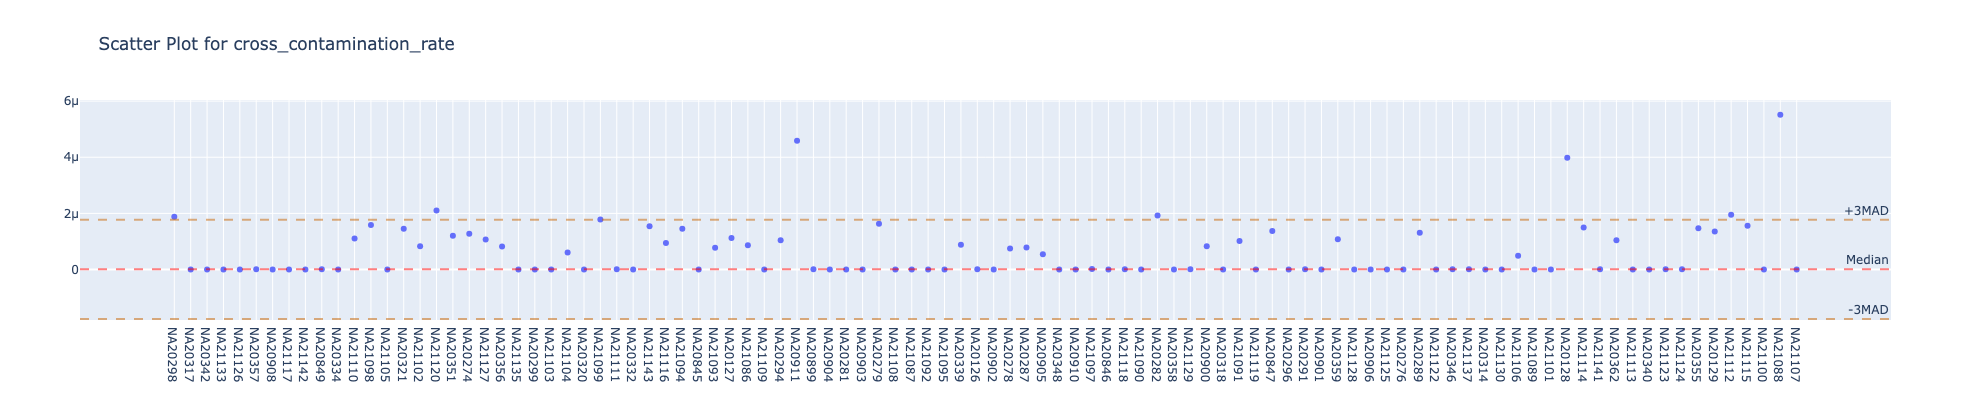

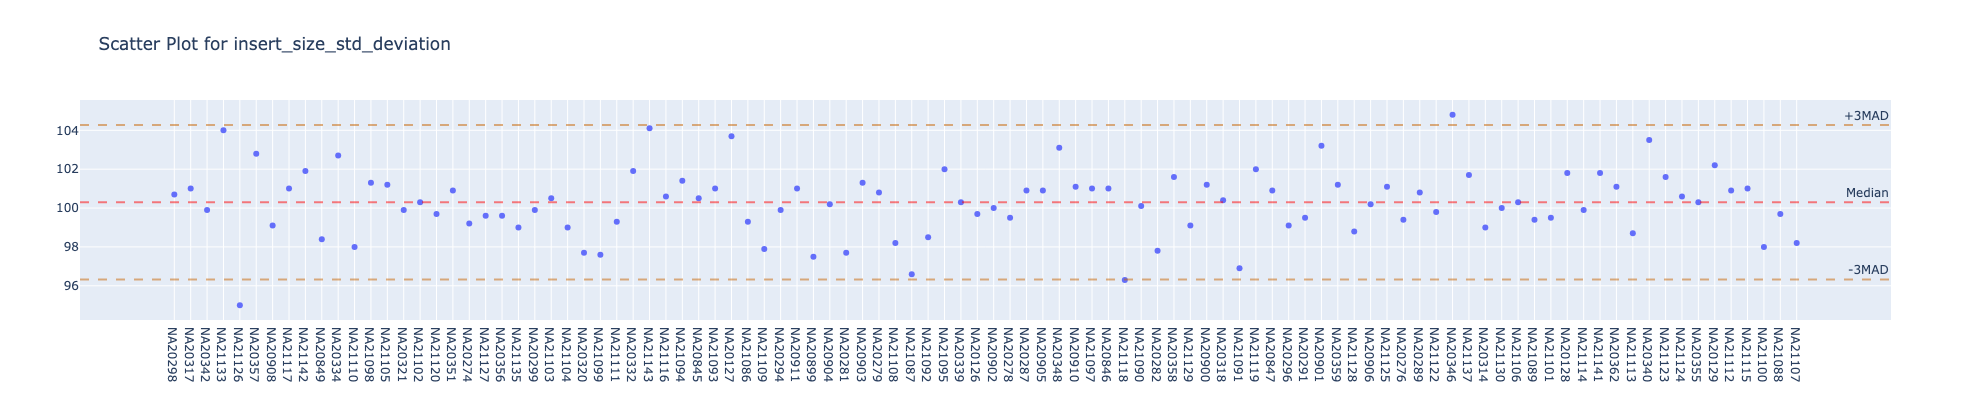

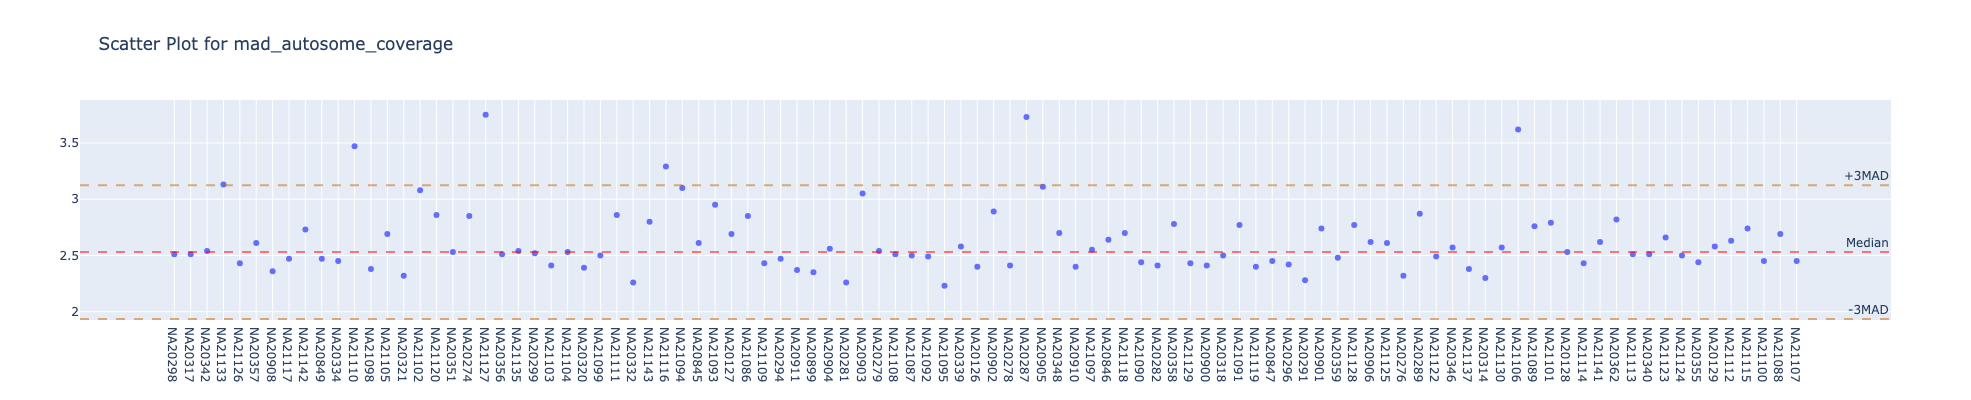

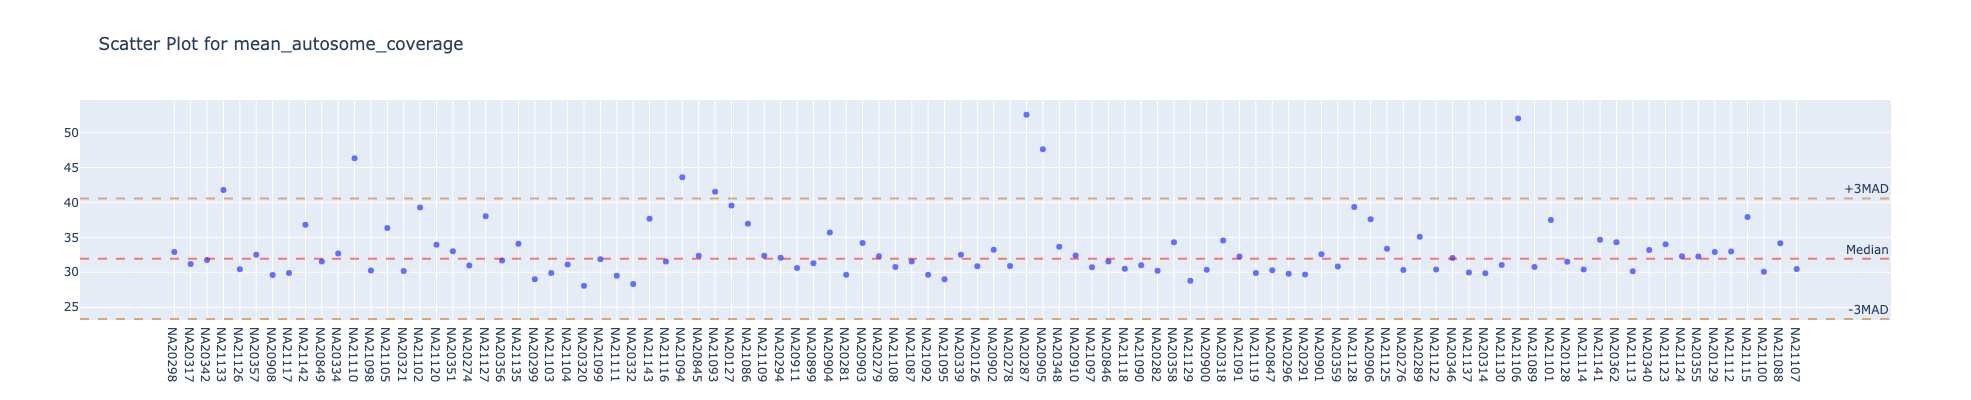

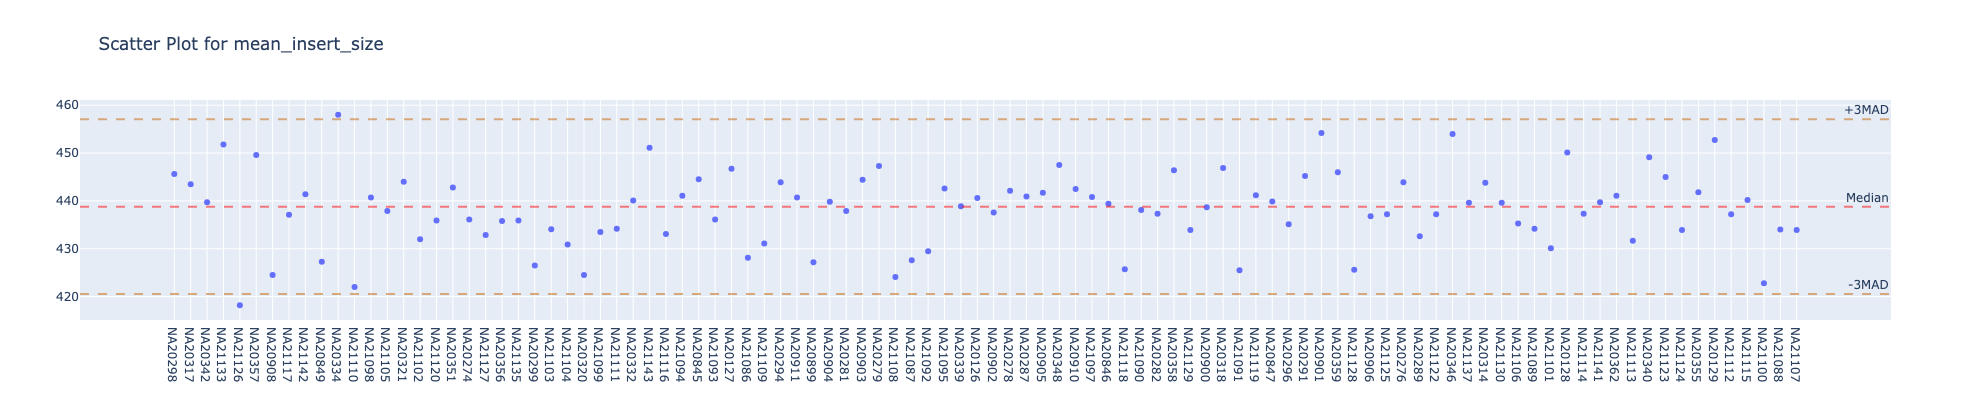

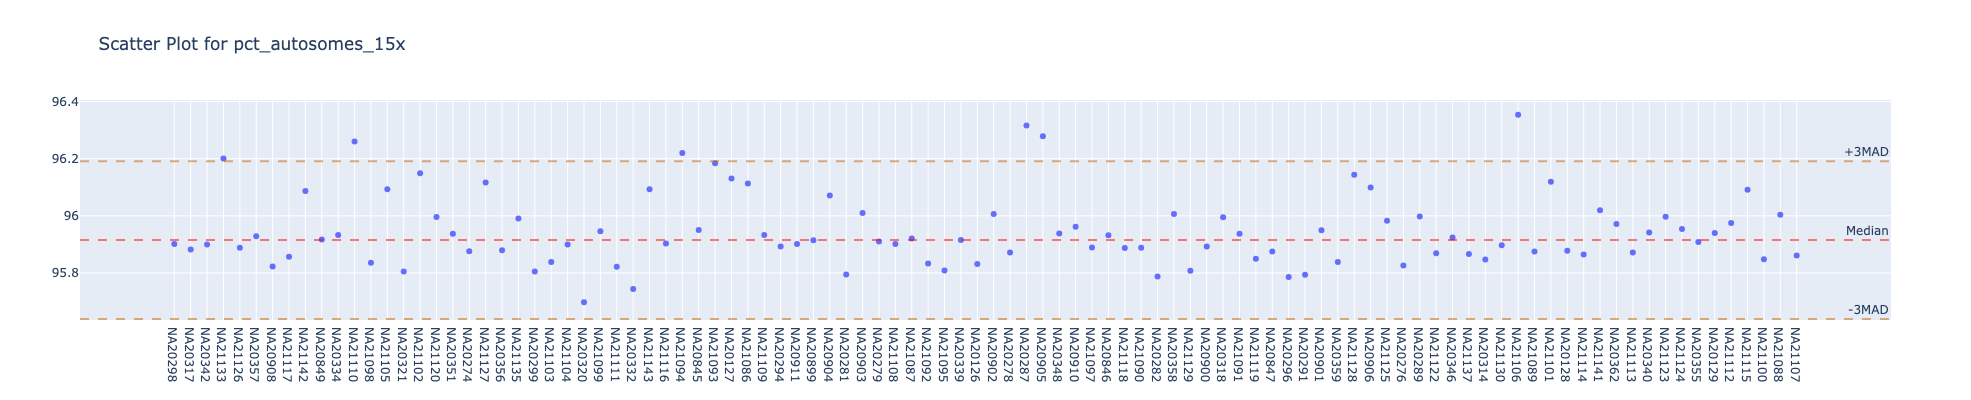

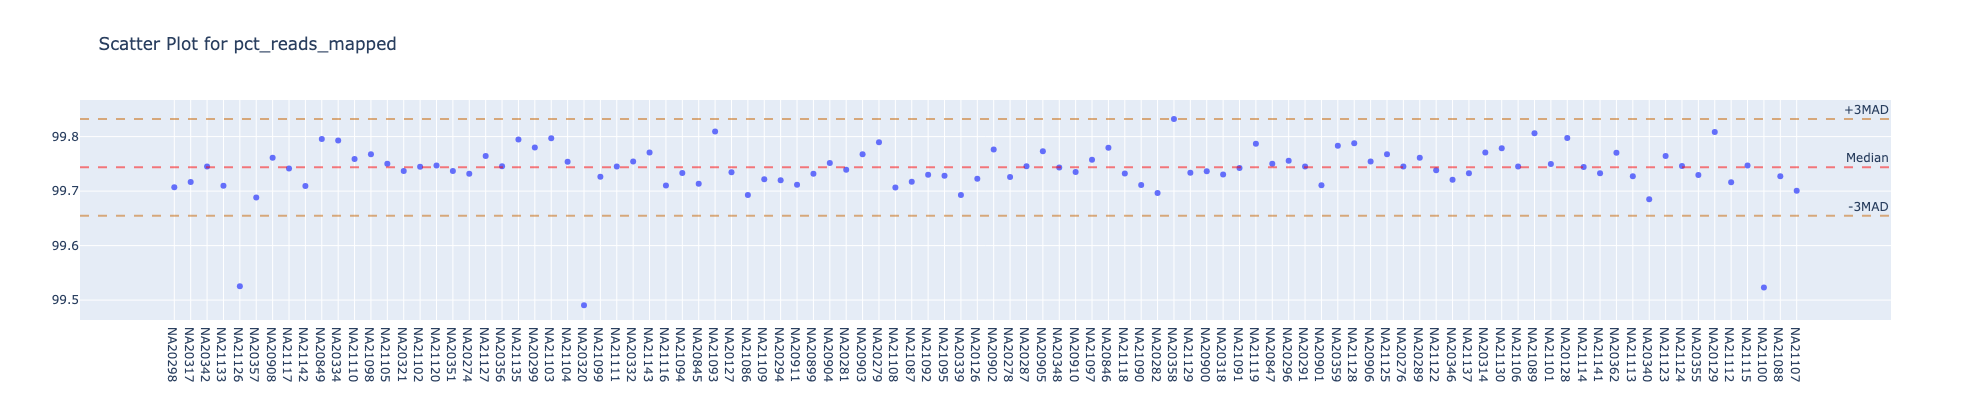

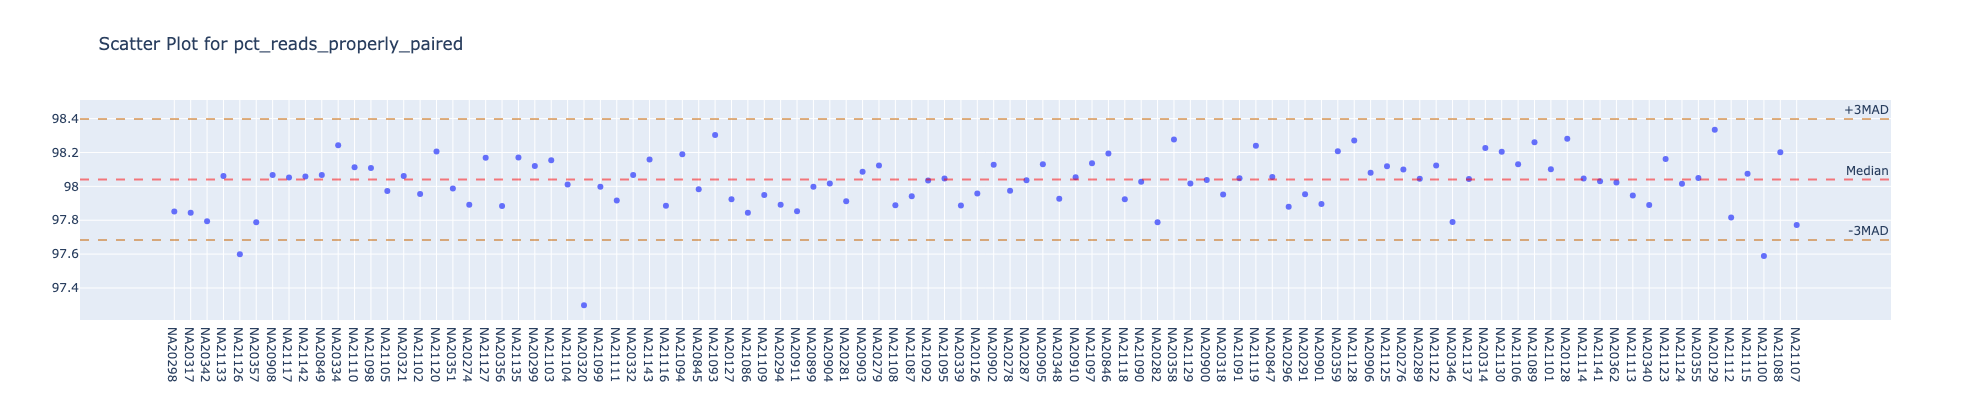

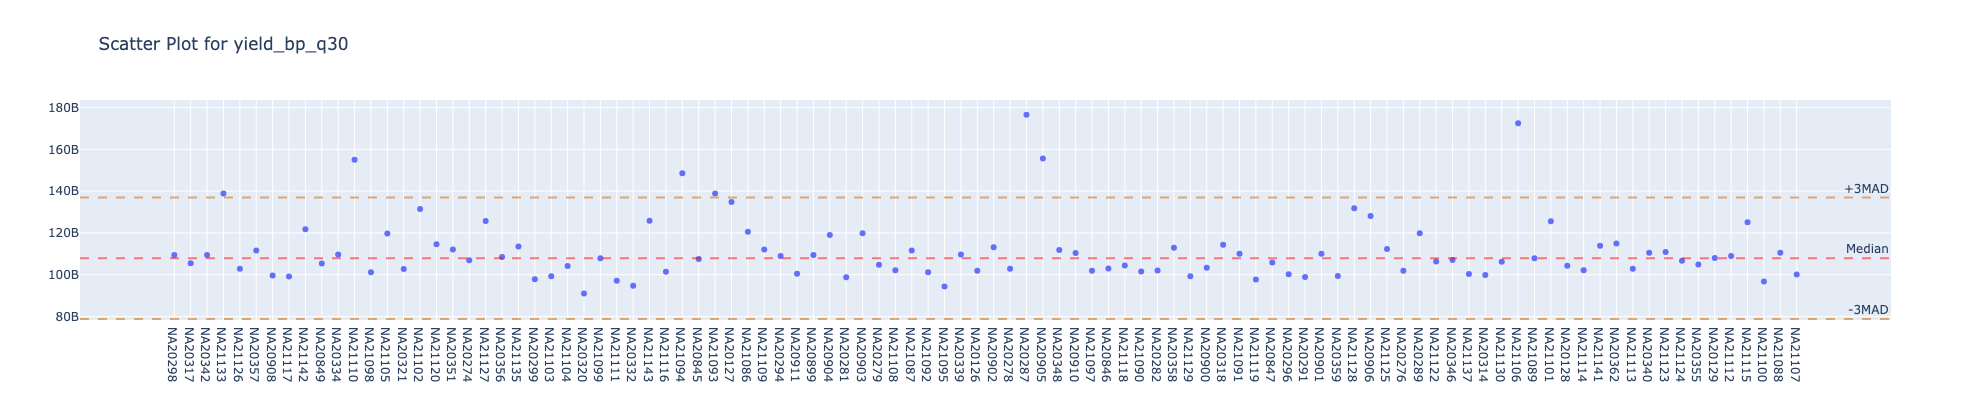

In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# For each metric
for col in dft.columns[1:]:
    # Scatter
    fig = px.scatter(dft, x="index", y=col)
    
    # Layout
    fig.layout = go.Layout(
        title = f"Scatter Plot for {col}",
        autosize=False,
        width=1000,
        height=400,
    )
    
    # Median
    median = dft[col].median()
    fig.add_hline(y=median, line_dash="dash", line_color="rgba(255, 0, 0, 0.5)", name="Median", annotation_text="Median")
    # Median average deviation
    mad = np.mean(np.abs(dft[col] - median))
    fig.add_hline(y=median + 3 * mad, line_dash="dash", line_color="rgba(200, 100, 0, 0.5)", name="+3MAD", annotation_text="+3MAD")
    fig.add_hline(y=median - 3 * mad, line_dash="dash", line_color="rgba(200, 100, 0, 0.5)", name="-3MAD", annotation_text="-3MAD")

    # Show
    fig.show()
    